In [40]:
import pandas as pd
# 欠損値があるままでは学習できないので欠損値処理だけ行う
df = pd.read_csv('cinema.csv')
df = df.fillna(df.mean())
x = df.loc[:, 'SNS1':'original']
t = df['sales']
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, t)

LinearRegression()

In [41]:
from sklearn.metrics import mean_squared_error
# 訓練データでのMSE値
pred = model.predict(x)

mse = mean_squared_error(pred, t)
mse

151986.03957624524

In [42]:
import math
math.sqrt(mse) # RMSEの計算

389.8538695155471

In [43]:
from sklearn.metrics import mean_absolute_error 
yosoku = [2, 3, 5, 7, 11, 13] # 予測結果をリストで作成
target = [3, 5, 8, 11, 16, 19] # 実際の結果をリストで作成

mse = mean_squared_error(yosoku, target)
print('rmse:{}'.format(math.sqrt(mse)))
print('mae:{}'.format(mean_absolute_error(yosoku, target)))

print('外れ値の混入')
yosoku = [2, 3, 5, 7, 11, 13, 46] # 実際には23だけど46と予測
target = [3, 5, 8, 11, 16, 19, 23]
mse = mean_squared_error(yosoku, target)
print('rmse:{}'.format(math.sqrt(mse)))
print('mae:{}'.format(mean_absolute_error(yosoku, target)))

rmse:3.8944404818493075
mae:3.5
外れ値の混入
rmse:9.411239481143202
mae:6.285714285714286


In [44]:
# データの準備
df = pd.read_csv('Survived.csv')
df = df.fillna(df.mean())

x = df[['Pclass', 'Age']]
t = df['Survived']

In [45]:
# モデルの準備
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 2,
random_state = 0)
model.fit(x, t)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [46]:
from sklearn.metrics import classification_report
pred = model.predict(x)
out_put = classification_report(y_pred = pred, y_true = t)
print(out_put)

              precision    recall  f1-score   support

           0       0.78      0.65      0.71       549
           1       0.56      0.70      0.62       342

    accuracy                           0.67       891
   macro avg       0.67      0.68      0.67       891
weighted avg       0.69      0.67      0.68       891



In [47]:
out_put = classification_report(y_pred = pred, y_true = t,
output_dict = True)

# out_putをデータフレームに変換
pd.DataFrame(out_put)

,0,1,accuracy,macro avg,weighted avg
precision,0.778742,0.558140,0.672278,0.668441,0.694066
recall,0.653916,0.701754,0.672278,0.677835,0.672278
f1-score,0.710891,0.621762,0.672278,0.666326,0.676680
support,549.000000,342.000000,0.672278,891.000000,891.000000


In [48]:
df = pd.read_csv('cinema.csv')
# 学習できないので欠損値処理だけ行う
df = df.fillna(df.mean())
x = df.loc[:, 'SNS1':'original']
t = df['sales']

In [49]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 3, shuffle = True, random_state = 0)

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.model_selection import cross_validate

result = cross_validate(model, x, t, cv = kf, scoring = 'r2',
return_train_score = True)
print(result)

{'fit_time': array([0.01177454, 0.01562929, 0.        ]), 'score_time': array([0., 0., 0.]), 'test_score': array([0.72465051, 0.71740834, 0.75975591]), 'train_score': array([0.76928501, 0.76368104, 0.75780074])}


In [51]:
sum(result['test_score']) / len(result['test_score'])

0.733938254177434

In [52]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 5,
    shuffle = True,random_state = 0)

In [53]:
iris = pd.read_csv("iris.csv")
iris = iris.fillna(iris.mean())
x = iris.loc[:,:"花弁幅"]
t = iris["種類"]
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
result = cross_validate(model, x, t, cv = skf, scoring = 'accuracy',
return_train_score = True)


FileNotFoundError: [Errno 2] File iris.csv does not exist: 'iris.csv'

In [54]:
result

{'fit_time': array([0.01177454, 0.01562929, 0.        ]),
 'score_time': array([0., 0., 0.]),
 'test_score': array([0.72465051, 0.71740834, 0.75975591]),
 'train_score': array([0.76928501, 0.76368104, 0.75780074])}

In [55]:
# 練習問題
import pandas as pd
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split

# 追加
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
import numpy as np #本書ではあまり紹介していないnumpyライブラリ

%matplotlib inline

df = pd.read_csv('Bank.csv')
# まず、ダミー変数化をしたいが、文字列の列が複数あるので抜き出す。
str_col_name=['job','default','marital','education','housing','loan','contact','month']
str_df = df[str_col_name]
#複数列を一気にダミー変数化
str_df2=pd.get_dummies(str_df,drop_first=True)

num_df = df.drop(str_col_name,axis=1)#数値列を抜き出す
df2 = pd.concat([num_df,str_df2,str_df],axis=1)#結合(今後の集計の利便性も考慮してstr_dfも結合しておく)
#訓練&検証データとテストデータに分割
train_val,test = train_test_split(df2,test_size=0.1,random_state=9)
train_val.head()

,id,age,amount,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,job,default,marital,education,housing,loan,contact,month
13378,13379,46,0.0,10,378.293875,1,0,1,0,0,...,0,0,unemployed,no,married,tertiary,yes,no,cellular,jul
3800,3801,41,-333.0,30,300.845752,3,2,0,1,0,...,0,0,blue-collar,no,divorced,secondary,yes,no,cellular,jan
10398,10399,30,5389.0,6,159.053623,3,0,1,0,0,...,0,0,management,no,single,tertiary,no,no,cellular,aug
23401,23402,39,255.0,5,334.802583,1,0,0,0,0,...,0,0,management,no,single,tertiary,yes,no,sending _document,may
26223,26224,47,33.0,5,NaN,1,0,1,0,0,...,0,0,services,no,single,secondary,yes,no,cellular,may


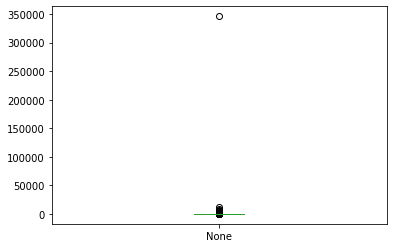

In [56]:
#欠損値の補正
from sklearn.covariance import MinCovDet
num_df=train_val.drop(str_col_name,axis=1)
num_df=num_df.drop('id',axis=1)
num_df2=num_df.dropna()
mcd2 =MinCovDet(random_state=0,support_fraction=0.7)
mcd2.fit(num_df2)
dis =mcd2.mahalanobis(num_df2)
dis=pd.Series(dis)
dis.plot(kind="box")
no=dis[dis>300000].index
#先頭から2561番目が外れ値となる事が分かったので９章の付録で紹介したilocを利用する
no=num_df2.iloc[no[0]:(no[0]+1),:].index
train_val2 = train_val.drop(no)

In [57]:
#欠損行を削除
not_nan_df = train_val2.dropna()#df2は外れ値が無いデータ
temp_t =not_nan_df[['duration']]
temp_x = not_nan_df.drop(str_col_name,axis=1)

#durationとyに関係があるという仮定が成り立つならば、適切な推定をするためには,
temp_x = temp_x.drop(['y','duration','id'],axis=1)
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import Lasso,Ridge

a,b,c,d= train_test_split(temp_x,temp_t,random_state=0,test_size=0.2)
maxvalue=0
v=0
#今回はLasso回帰を利用するので、特徴量選択はしない
for i in range(1,42):
    val = i/20
    model_liner = Lasso(random_state=0,alpha=val)
    #今回は予測させたいだけなので、標準化はしない
    model_liner.fit(a,c)
    if maxvalue < model_liner.score(b,d):
        v=val
        maxvalue = model_liner.score(b,d)
print(v,maxvalue)
model_liner = Lasso(random_state=0,alpha=v)
#今回は予測させたいだけなので、標準化はしない
model_liner.fit(a,c)
#pd.Series(model_liner)


0.15 0.7304944115519963


Lasso(alpha=0.15, random_state=0)

In [58]:
#実際に使うのは外れ値込みのデータ
train_val3 = train_val.copy()
is_null=train_val3['duration'].isnull()
temp_x = train_val3.drop(str_col_name,axis=1)
temp_x = temp_x.drop(['y','duration','id'],axis=1)
temp_x = temp_x[is_null]
#non_x=train_val2.loc[is_null,['housing_yes','loan_yes','age','marital_single','job_student']]
pred_d = model_liner.predict(temp_x)
train_val3.loc[is_null,'duration']=pred_d

In [59]:
#12章付録で紹介したアンダーサンプリングを行う
def under_sampling(train_val):
    y_0=train_val[train_val['y']==0]
    y_1=train_val[train_val['y']==1]
    num_1 = len(y_1)
    #Y=1と同じ件数だけサンプリング
    y_0_2 =y_0.sample(n=num_1,random_state=0)
    train_val2 = pd.concat([y_1,y_0_2])
    return train_val2

In [60]:
#学習をさせよう。ただし、13章で学習した知識を使いたい。これまでは正解率を考えてきたが、今回のケースだと適合率
#再現率のどちらを見るべきだろうか？

# y=1の適合率が高い⇒無駄なアポイントメントを減らす事が出来る。
# y=1の再現率が高い⇒潜在顧客を見逃さない

#スッキリ銀行は、効率よくキャンペーンを回したいと考えているので、y=1適合率に着目する

In [62]:
#まず、さくっと学習できるようなlearn関数を定義する。ただし、正解率では無くて適合率をみる
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
def learn(x,t,i):
    x_train,x_val,y_train,y_val = train_test_split(x,t,test_size=0.2,random_state=13)

    datas=[x_train,x_val,y_train,y_val]
    base = DecisionTreeClassifier(max_depth=i,random_state=0,class_weight="balanced")
    #model = AdaBoostClassifier(n_estimators=150,base_estimator=base,random_state=0)
    
    #　追加
    
    base.fit(x_train,y_train)
    train_pred = base.predict(x_train)
    test_pred = base.predict(x_val)
    result = classification_report(y_pred=test_pred,y_true=y_val,output_dict=True)
    return result,base,datas

t =train_val3['y']
x = train_val3.drop(str_col_name,axis=1)
x =x.drop(['id','y','day'],axis=1)
res,model,datas = learn(x,t,i=8)
res_df=pd.DataFrame(res)
res_df
#res_df.iloc[0,1]

,0,1,accuracy,macro avg,weighted avg
precision,0.909652,0.588152,0.769609,0.748902,0.810891
recall,0.741058,0.834000,0.769609,0.787529,0.769609
f1-score,0.816745,0.689826,0.769609,0.753286,0.777757
support,3383.000000,1500.000000,0.769609,4883.000000,4883.000000


In [63]:
#適合率が低い。
# 12章で学習したランダムフォレストとアダブーストだとどうなるか？
def learn2(x,t,i,de=5,forest=True):
    x_train,x_val,y_train,y_val = train_test_split(x,t,test_size=0.2,random_state=13)

    datas=[x_train,x_val,y_train,y_val]
    model=None
    if forest:
        model = RandomForestClassifier(n_estimators=i,random_state=0,max_depth=de,class_weight="balanced")
    #datas=[x_train,x_val,y_train,y_val]
    else:
        base = DecisionTreeClassifier(max_depth=de,random_state=0,class_weight="balanced")
        model = AdaBoostClassifier(n_estimators=i,base_estimator=base,random_state=0)
    #model = AdaBoostClassifier(n_estimators=150,base_estimator=base,random_state=0)
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_val)
    result = classification_report(y_pred=test_pred,y_true=y_val,output_dict=True)
    return result,model,datas
t =train_val3['y']
x = train_val3.drop(str_col_name,axis=1)
x =x.drop(['id','y','day'],axis=1)

In [64]:
#ランダムフォレストでの検証
print("=================random_forest=========================")
max_pre=0
for i in [50,100,150,200]:#esti
    for j in range(5,11):#depth
        res,model,datas = learn2(x,t,i=i,de=j,forest=True)
        res2=pd.DataFrame(res)
        pre = res2.iloc[0,1]
        if max_pre < pre:
            max_pre=pre
            print(max_pre,i,j)
        print(i,j,pre,"finish next_i")
#アダブーストでの検証
print("=================adaboost=========================")
max_pre=0
for i in [50,100,150,200]:#esti
    for j in range(5,11):#depth
        res,model,datas = learn2(x,t,i=i,de=j,forest=False)
        res2=pd.DataFrame(res)
        pre = res2.iloc[0,1]
        if max_pre < pre:
            max_pre=pre
            print(max_pre,i,j)
        print(i,j,pre,"finish next_i")


=================random_forest=========================
0.559322033898305 50 5
50 5 0.559322033898305 finish next_i
0.5599214145383105 50 6
50 6 0.5599214145383105 finish next_i
0.568193008370261 50 7
50 7 0.568193008370261 finish next_i
0.5787654320987654 50 8
50 8 0.5787654320987654 finish next_i
0.5834578973592427 50 9
50 9 0.5834578973592427 finish next_i
0.5941737820190859 50 10
50 10 0.5941737820190859 finish next_i
100 5 0.5660282258064516 finish next_i
100 6 0.5663189269746647 finish next_i
100 7 0.5702891326021934 finish next_i
100 8 0.5761458846722524 finish next_i
100 9 0.5863291139240506 finish next_i
0.5961440892947742 100 10
100 10 0.5961440892947742 finish next_i
150 5 0.565590312815338 finish next_i
150 6 0.5665342601787487 finish next_i
150 7 0.5709325396825397 finish next_i
150 8 0.573754316724223 finish next_i
150 9 0.5828313253012049 finish next_i
150 10 0.5944444444444444 finish next_i
200 5 0.5668179525970751 finish next_i
200 6 0.56751370204285 finish next_i
200 

In [65]:
#非常に時間がかかるので途中で終了。
#random_forestよりadaboostの方がvalデータの精度が良く、その中でもestimator=100,max_depth=8が最も高い

#estimatorの値を100と固定して、max_depthについての考察を深める。k-分割交差検証
#で最適なmax_depthを考察するｂ
def learn_k_valid(x,t,i,dep):
    base = DecisionTreeClassifier(max_depth=dep,random_state=0,class_weight="balanced")
    model = AdaBoostClassifier(n_estimators=150,base_estimator=base,random_state=0)
    kv = StratifiedKFold(n_splits=3,shuffle=True,random_state=0)
    result = cross_validate(model,x,t,cv=kv,scoring='precision',return_train_score=True)
    
    #base.fit(x_train,y_train)
    #train_pred = base.predict(x_train)
    #test_pred = base.predict(x_val)
    #result = classification_report(y_pred=test_pred,y_true=y_val,output_dict=True)
    return result


In [66]:
t =train_val3['y']
x = train_val3.drop(str_col_name,axis=1)
x =x.drop(['id','y','day'],axis=1)
for j in range(2,10):
    res = learn_k_valid(x,t,i=100,dep=j)
    res2=res["train_score"]
    print(j,sum(res2)/len(res2),end="  ")#平均値    
    res3=res["test_score"]
    
    print(j,sum(res3)/len(res3))#平均値
    print(" j end next")

2 0.693870965005931  2 0.6559046281758386
 j end next
3 0.7363985362053104  3 0.6423783016465944
 j end next
4 0.825276543095041  4 0.6306426806832551
 j end next
5 0.9486197738647456  5 0.6242689517885056
 j end next
6 1.0  6 0.6213290409281033
 j end next
7 1.0  7 0.6373482216979219
 j end next
8 1.0  8 0.6549952326468345
 j end next
9 1.0  9 0.6777582841463455
 j end next


In [67]:
#検証データの適合率が最も良いのは深さ9だが、明らかに過学習している。
# アンダーサンプリングで不均衡データの影響が変わるか確認してみる

In [68]:
train_val4 = under_sampling(train_val3)
t =train_val4['y']
x = train_val4.drop(str_col_name,axis=1)
x =x.drop(['id','y','day'],axis=1)
for j in range(2,10):
    res = learn_k_valid(x,t,i=100,dep=j)
    res2=res["train_score"]
    print(j,sum(res2)/len(res2),end="  ")#平均値    
    res3=res["test_score"]
    
    print(j,sum(res3)/len(res3))#平均値
    print(" j end next")

2 0.8358366359771408  2 0.7958753028990714
 j end next
3 0.8827649771765654  3 0.7743591350564145
 j end next
4 0.9510066312264068  4 0.7504733530008085
 j end next
5 0.999616135071336  5 0.7371001600894225
 j end next
6 1.0  6 0.7366393165293385
 j end next
7 1.0  7 0.7427783401018434
 j end next
8 1.0  8 0.7569298814734918
 j end next
9 1.0  9 0.7629237232771438
 j end next


In [81]:
#深さ2~３当たりが最もよさそうである。
#テストデータで検証するために再学習

In [69]:
train_val4=under_sampling(train_val3)
t =train_val4['y']
x = train_val4.drop(str_col_name,axis=1)
x =x.drop(['id','y','day'],axis=1)
base_model = RandomForestClassifier(max_depth=3,random_state=0,class_weight="balanced")
model = AdaBoostClassifier(random_state=0,n_estimators=100,base_estimator=base_model)
model.fit(x,t)

AdaBoostClassifier(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                         max_depth=3,
                                                         random_state=0),
                   n_estimators=100, random_state=0)

In [70]:
#テストデータ
test2 = test.copy()    
isnull=test2['duration'].isnull()
print(isnull.shape)
if isnull.sum()>0:
    temp_x = test2.drop(str_col_name,axis=1)
    temp_x = temp_x.drop(['y','duration','id'],axis=1)
    temp_x = temp_x[isnull]
    pred_d = model_liner.predict(temp_x)
    test2.loc[isnull,'duration']=pred_d    
x_test = test2.drop(str_col_name,axis=1)
x_test =x_test.drop(['id','y','day'],axis=1)
y_test = test['y']

(2713,)


In [71]:
pre = model.predict(x_test)
result= classification_report(y_pred=pre,y_true=y_test,output_dict=True)
pd.DataFrame(result)

,0,1,accuracy,macro avg,weighted avg
precision,0.895679,0.640439,0.792849,0.768059,0.813923
recall,0.786876,0.805524,0.792849,0.796200,0.792849
f1-score,0.837760,0.713558,0.792849,0.775659,0.797977
support,1844.000000,869.000000,0.792849,2713.000000,2713.000000


In [72]:
#y=1の適合率は0.64

In [73]:

#本書で紹介していないnumpyのテクニックを使っているが
#同様の事はpandasでもできる
#参考　予測確率の閾値を変更する事により予測結果を変えて調整する
#確率でいったん予測させる
y_p = model.predict_proba(x)
y_p
a=y_p[:,1]#y=1の確率を抜き出す
def conf(a,th=0.5):
    import numpy as np
    y_pre=np.where(a<th,0,1)#閾値以下なら0,以上なら1
    from sklearn.metrics import confusion_matrix
    #混同行列をscikit-learnの関数で作成
    mat= confusion_matrix(y_pred=y_pre,y_true=t)
    pre = mat[1,1]/(mat[1,1]+mat[0,1])
    re = mat[1,1]/(mat[1,1]+mat[1,0])
    f1 = 2*(pre*re)/(pre+re)
    return pre,f1,mat#適合率、ｆ１スコア、混同行列
conf(a,0.5)#閾値0.5

(0.8325516542020535,
 0.8365280519645928,
 array([[6493, 1321],
        [1246, 6568]], dtype=int64))

In [74]:
#presitionを上げるためには閾値をもう少しあげればよい
#ただし、閾値を上げすぎると適合率が低下してしまうのでf1スコアも意識する
for i in range(1,30):
    val = 0.50+(i/1000)
    print(i)
    b=conf(a,val)#閾値0.5
    print(val,b[0],b[1])

1
0.501 0.8679299454493253 0.8181326116373479
2
0.502 0.8973109243697479 0.7757919209532113
3
0.503 0.9245689655172413 0.7306084533209476
4
0.504 0.9483044818591416 0.6647826448341784
5
0.505 0.9675578251727246 0.5781207933231626
6
0.506 0.9810003877471888 0.4868661599153276
7
0.507 0.9882111737570477 0.39487967229902715
8
0.508 0.9909659485753995 0.308224359667135
9
0.509 0.995069033530572 0.22859084730403265
10
0.51 1.0 0.17152217152217153
11
0.511 1.0 0.122537241710716
12
0.512 1.0 0.08574228319451249
13
0.513 1.0 0.05670231285749813
14
0.514 1.0 0.03766951280763435
15
0.515 1.0 0.02252309249652031
16
0.516 1.0 0.013474005338756834
17
0.517 1.0 0.008410857652606091
18
0.518 1.0 0.006378364587319811
19
0.519 1.0 0.0040868454661558105
20
0.52 1.0 0.0017900524229638153
21
0.521 1.0 0.0010232796111537478
22
0.522 1.0 0.0007675578866572853
23
0.523 1.0 0.0005117707267144319
24
0.524 1.0 0.00025591810620601403
25
0.525 nan nan
26
0.526 nan nan
27
0.527 nan nan
28
0.528 nan nan
29
0.529 na

C:\Users\81806\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in longlong_scalars
  


In [75]:
#閾値を0.503にすると全体的に最もよさそう。
th=0.503
#テストデータ
proba = model.predict_proba(x_test)

In [76]:
a = proba[:,1]
pre=np.where(a<th,0,1)
result= classification_report(y_pred=pre,y_true=y_test,output_dict=True)
pd.DataFrame(result)

,0,1,accuracy,macro avg,weighted avg
precision,0.813773,0.745008,0.797272,0.779390,0.791747
recall,0.909978,0.558113,0.797272,0.734046,0.797272
f1-score,0.859191,0.638158,0.797272,0.748674,0.788392
support,1844.000000,869.000000,0.797272,2713.000000,2713.000000
